# Analyze Received Long Multi Tone Calibration WAV File
## By Terry Bondy, VA3TYB

In [1]:
printf(strftime ("Last updated: %A %e %B %Y %Z", localtime (time())))
%plot --format svg
format free
pkg load signal

Last updated: Saturday 11 January 2020 UTC

In [2]:
inputFilename = "/mnt/lexar/SDRuno_20200107_005334Z_445900kHz_trimmed.wav"

inputFilename = /mnt/lexar/SDRuno_20200107_005334Z_445900kHz_trimmed.wav


In [3]:
audioinfo(inputFilename)

ans =

  scalar structure containing the fields:

    Filename = /mnt/lexar/SDRuno_20200107_005334Z_445900kHz_trimmed.wav
    CompressionMethod = 
    NumChannels = 2
    SampleRate = 62500
    TotalSamples = 1.40625e+07
    Duration = 225
    BitsPerSample = -1
    BitRate = -1
    Title = 
    Artist = 
    Comment = 



In [4]:
[SamplesIQRV, sampleRate] = audioread(inputFilename);
size(SamplesIQRV)
sampleRate

ans =

 1.40625e+07 2


sampleRate = 62500


In [5]:
SamplesRV=SamplesIQRV(:,1)+i*SamplesIQRV(:,2);
size(SamplesRV)

ans =

 1.40625e+07 1




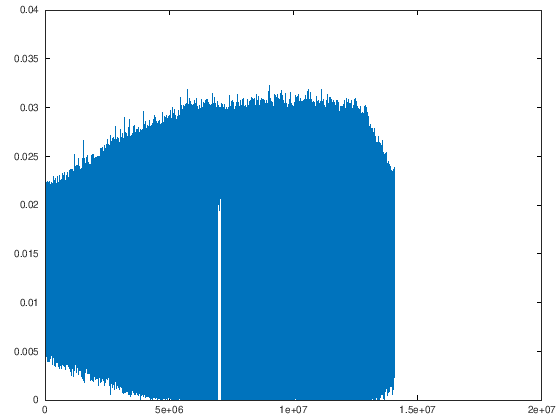

In [6]:
plot(abs(SamplesRV));

In [7]:
numPeriods = rows(SamplesRV)/sampleRate;
period = numPeriods;
TshortRV = [0:1/sampleRate:1](:);
TfullRV = [0:1/sampleRate:period](:);

In [8]:
RaisedCosineRV = (1 - cos(2*pi*TshortRV))/2;
size(RaisedCosineRV)

ans =

 62501 1




In [9]:
SigSec0RV = SamplesRV(1:rows(RaisedCosineRV)) .* RaisedCosineRV;
size(SigSec0RV)

ans =

 62501 1




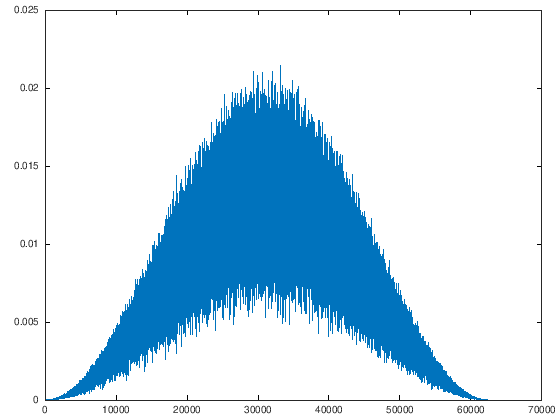

In [10]:
plot(abs(SigSec0RV));

In [24]:
FftSec0RV = abs(fftshift(fft(SigSec0RV, sampleRate*10 + 1)));
FreqSec0RV = [linspace(-sampleRate/2, sampleRate/2, rows(FftSec0RV))](:);

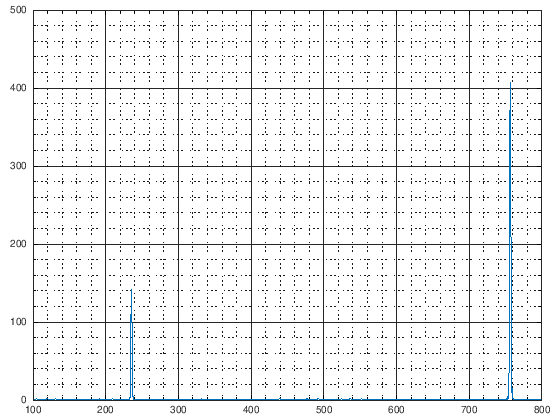

In [28]:
plot(FreqSec0RV, FftSec0RV)
grid on
grid minor
axis([100 800], "tic")

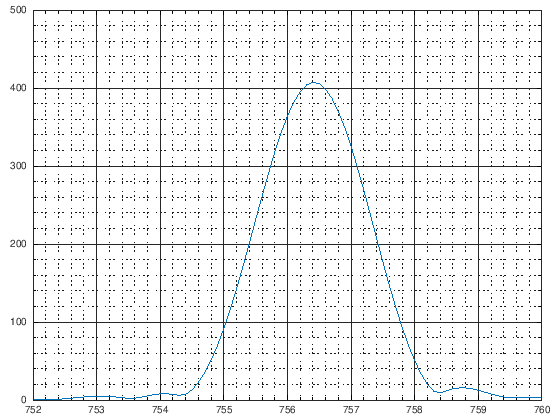

In [34]:
plot(FreqSec0RV, FftSec0RV)
grid on
grid minor
axis([756-4 756+4], "tic")

In [31]:
FreqSec0RV(find(FftSec0RV(:) == max(FftSec0RV)))

ans = 756.4


In [32]:
find(FftSec0RV(:) == max(FftSec0RV))

ans = 320065


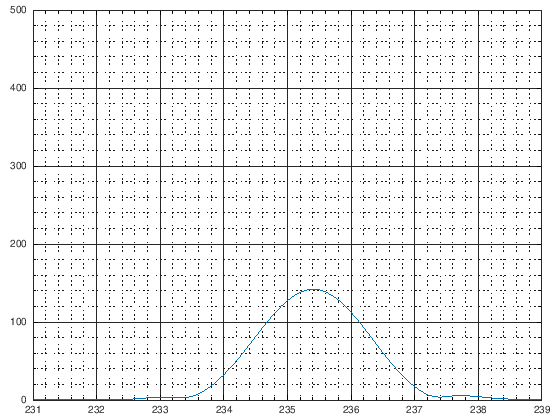

In [41]:
plot(FreqSec0RV, FftSec0RV)
grid on
grid minor
axis([235-4 235+4], "tic")

In [42]:
find(FreqSec0RV(:) == 230)

ans = 314801


In [43]:
find(FreqSec0RV(:) == 245)

ans = 314951


In [44]:
FreqSec0RV(find(FftSec0RV(:) == max(FftSec0RV(314801:314951))))

ans = 235.4


In [45]:
F_base(find(E_cos_pulse(:) == max(E_cos_pulse(314801:314951)))) - ...
F_base(find(E_cos_pulse(:) == max(E_cos_pulse)))

error: 'E_cos_pulse' undefined near line 1 column 13


In [21]:
721 - 521

ans = 200


In [22]:
fracSeconds = 1;
indexIncr = (columns(Tshort)-1)/fracSeconds;
Freqs = [];
for startIndex = 1:indexIncr:rows(z)-columns(RC)-1
  time = T(startIndex)
  SigLoopRV = z(startIndex:startIndex+columns(RC)-1)' .* RC;
  FftLoopRV = fft(SigLoopRV, sampleRate*10 + 1);
  FftLoopAbsRV = abs(FftLoopRV);
  FftLoopPolCV = cart2pol(real(FftLoopRV), imag(FftLoopRV)); # rows of [theta, r]
  FreqLoopRV = linspace(-sampleRate/2, sampleRate/2, columns(FftLoopRV));
  freqMaxPeak = FreqLoopRV(find(FftLoopAbsRV(:) == max(FftLoopAbsRV)))
  [PeaksCV idxPeaksCV] = findpeaks(FftLoopPolCV(:,2), "MinPeakHeight", 50);
  # size(PeaksCV)
  # size(idxPeaksCV)
  PeaksCV
  FreqLoopRV(idxPeaksCV)
endfor

error: 'Tshort' undefined near line 1 column 22
error: 'z' undefined near line 1 column 35
